In [10]:
!unzip coco128.zip

Archive:  coco128.zip
   creating: coco128/
  inflating: coco128/LICENSE         
   creating: coco128/images/
   creating: coco128/images/train2017/
  inflating: coco128/images/train2017/000000000612.jpg  
  inflating: coco128/images/train2017/000000000404.jpg  
  inflating: coco128/images/train2017/000000000438.jpg  
  inflating: coco128/images/train2017/000000000389.jpg  
  inflating: coco128/images/train2017/000000000564.jpg  
  inflating: coco128/images/train2017/000000000149.jpg  
  inflating: coco128/images/train2017/000000000605.jpg  
  inflating: coco128/images/train2017/000000000349.jpg  
  inflating: coco128/images/train2017/000000000201.jpg  
  inflating: coco128/images/train2017/000000000599.jpg  
  inflating: coco128/images/train2017/000000000572.jpg  
  inflating: coco128/images/train2017/000000000360.jpg  
  inflating: coco128/images/train2017/000000000370.jpg  
  inflating: coco128/images/train2017/000000000562.jpg  
  inflating: coco128/images/train2017/000000000589.j

In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Create root directories
os.makedirs('train/images', exist_ok=True)
os.makedirs('train/labels', exist_ok=True)
os.makedirs('val/images', exist_ok=True)
os.makedirs('val/labels', exist_ok=True)

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Get a list of all image files and filter for images
image_files = sorted([f for f in os.listdir('coco128/images/train2017') if f.endswith('.jpg')])

# Split the data into training and validation sets
train_images, val_images = train_test_split(
    image_files, test_size=0.2, random_state=42
)

# Move the training images and labels
for image in train_images:
    label = os.path.splitext(image)[0] + '.txt'

    image_source = os.path.join('coco128/images/train2017', image)
    label_source = os.path.join('coco128/labels/train2017', label)

    if os.path.exists(label_source):
        shutil.move(image_source, 'train/images')
        shutil.move(label_source, 'train/labels')

# Move the validation images and labels
for image in val_images:
    label = os.path.splitext(image)[0] + '.txt'

    image_source = os.path.join('coco128/images/train2017', image)
    label_source = os.path.join('coco128/labels/train2017', label)

    if os.path.exists(label_source):
        shutil.move(image_source, 'val/images')
        shutil.move(label_source, 'val/labels')

In [13]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [14]:

import yaml
import os

data = {
    'train': os.path.abspath('train/images'),
    'val': os.path.abspath('val/images'),
    'nc': 80,
    'names': [
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
        'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
        'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
        'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
        'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
        'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
        'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
        'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]
}

with open('data.yaml', 'w') as f:
    yaml.dump(data, f)

In [16]:
from ultralytics import YOLO

# Load a pre-trained model
model = YOLO('yolov8n.pt')

# Train the model
model.train(data='data.yaml', epochs=100, imgsz=640)

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fa

train: Scanning /content/train/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 290.8±68.0 MB/s, size: 49.3 KB)


val: Scanning /content/val/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.71G      1.208      1.621       1.24         66        640: 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         26        127      0.666      0.624      0.742      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.13G      1.204      1.509      1.264         45        640: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         26        127      0.639      0.619      0.742      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.13G      1.191       1.37       1.24         90        640: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         26        127      0.625      0.617      0.742      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.13G      1.153      1.363      1.182         58        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         26        127       0.62      0.589      0.727      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.13G      1.141      1.366      1.229         50        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         26        127      0.573      0.613      0.729      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.13G      1.209      1.356      1.225         44        640: 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         26        127      0.529      0.632       0.73      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.13G      1.106      1.218      1.185         51        640: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         26        127      0.677      0.536      0.719      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.13G      1.176      1.294      1.183         52        640: 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         26        127      0.699      0.519      0.692      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.13G      1.106      1.106      1.162         43        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         26        127      0.531      0.633      0.677      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.13G      1.118      1.174      1.174         77        640: 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         26        127      0.522      0.627      0.671      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.13G      1.103      1.096      1.142         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         26        127      0.523      0.611      0.666      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.13G      1.068        1.1      1.141         72        640: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


                   all         26        127      0.489      0.628      0.668      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.13G      1.075      1.032      1.154         73        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         26        127      0.493      0.615      0.669      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.13G      1.141      1.142      1.162         47        640: 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         26        127      0.671      0.513      0.688      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.28G        1.1      1.053      1.156         55        640: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         26        127      0.608      0.517      0.672      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.28G      1.123      1.079      1.161         24        640: 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         26        127      0.681       0.49      0.684      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.28G      1.033      1.044       1.12         37        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         26        127      0.486      0.575      0.684       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.28G     0.9901     0.9922       1.12         28        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         26        127       0.52      0.589      0.686      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.28G      1.025     0.9163      1.105         56        640: 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         26        127      0.508      0.607       0.68      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.28G      1.077     0.9886      1.112         48        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         26        127      0.522       0.59      0.653       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.28G      1.029     0.9441      1.095         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         26        127      0.523      0.581      0.652       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.28G      1.039      0.959      1.118         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         26        127      0.517      0.563      0.641      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.28G      1.053      1.007       1.12         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         26        127      0.496      0.556      0.638      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.28G       1.03     0.9863      1.106         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         26        127      0.485      0.558      0.617      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.28G      1.018     0.9159      1.102         33        640: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         26        127      0.487      0.575      0.624      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.28G       1.04     0.9234      1.124         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         26        127      0.501      0.583      0.614      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.28G     0.9714      0.895      1.084         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         26        127      0.507      0.581      0.612       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.28G      1.016     0.8583      1.086         25        640: 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         26        127      0.513      0.558      0.609      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.28G      0.961     0.8656      1.082         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         26        127      0.514      0.569      0.615      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.28G     0.9228     0.9053      1.073         36        640: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         26        127      0.587      0.521      0.617      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.28G     0.9972     0.8532       1.08         65        640: 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         26        127      0.601      0.518      0.613      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.28G     0.9568     0.8293      1.107         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         26        127      0.645      0.519      0.623      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.28G     0.9709     0.8121      1.061         44        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         26        127      0.648      0.518      0.623      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.28G      1.036     0.9416      1.094         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         26        127      0.546      0.526      0.585      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.28G     0.9588     0.7992      1.083         25        640: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         26        127      0.455      0.546      0.569      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.28G      0.975     0.8374       1.07         35        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         26        127       0.48      0.574      0.569      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.28G     0.9534     0.8327      1.084         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         26        127      0.763      0.412      0.557      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.28G     0.9616     0.8398      1.069         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         26        127      0.488      0.564       0.55      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.28G     0.9297     0.8704      1.089         29        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         26        127      0.628      0.464       0.57      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.28G      1.006     0.8242      1.075         72        640: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         26        127       0.64       0.45      0.564      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.28G     0.9307     0.8324       1.07         50        640: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         26        127      0.651      0.487      0.577      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.28G     0.9314     0.8009      1.065         91        640: 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         26        127       0.65      0.474      0.582      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.44G     0.9397     0.8352      1.065         55        640: 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         26        127      0.554      0.522      0.588      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.44G     0.9357     0.8055      1.074         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         26        127      0.557      0.513      0.603      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.44G     0.9829     0.9141      1.097        126        640: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         26        127      0.558      0.511      0.606      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.44G     0.8625     0.7838      1.039         29        640: 100%|██████████| 7/7 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         26        127      0.553      0.532      0.624      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.44G     0.9531     0.8111      1.093         22        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         26        127      0.543      0.534       0.62      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.44G        0.9     0.7594      1.067         39        640: 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         26        127      0.529       0.55      0.615      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.44G     0.9368     0.8107      1.072         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         26        127      0.517      0.555      0.613      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.44G     0.8914     0.7309      1.038         56        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         26        127      0.784      0.408      0.613      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.44G     0.9304     0.8162      1.061         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         26        127      0.756       0.41      0.609      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.44G     0.8707      0.771      1.042         91        640: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         26        127      0.747      0.408        0.6      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.44G     0.8729     0.7433      1.029         78        640: 100%|██████████| 7/7 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         26        127      0.568      0.504      0.596      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.44G     0.8607     0.7338      1.029         41        640: 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         26        127      0.531      0.531       0.62      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.44G     0.8411     0.7603      1.026         37        640: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         26        127      0.542      0.532      0.611      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.44G     0.9103     0.7738      1.048         94        640: 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         26        127      0.573      0.492      0.609      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.44G     0.9371     0.7884      1.048         92        640: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         26        127      0.553      0.492      0.607      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.61G     0.8974     0.7687      1.032         67        640: 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         26        127      0.621      0.497      0.608      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.61G     0.9395     0.9516      1.082         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         26        127      0.621      0.498      0.628      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.61G     0.9069     0.7641      1.046         39        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         26        127      0.551      0.502      0.624      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.61G     0.8909     0.7519      1.033         48        640: 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         26        127      0.545      0.564      0.616      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.61G      0.884     0.7337      1.053         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         26        127      0.514      0.568       0.62       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.61G     0.8678     0.6998      1.023         21        640: 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         26        127      0.513      0.565      0.617       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.61G      0.858      0.721      1.027         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         26        127      0.558      0.535      0.613      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.61G     0.9222     0.7455      1.025         94        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         26        127      0.524      0.546        0.6      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.61G     0.8986     0.7503      1.043         65        640: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         26        127      0.519       0.54      0.599      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.61G     0.8264     0.6887      1.021         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         26        127      0.493      0.544      0.608       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.61G      0.862     0.7398       1.02        121        640: 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         26        127      0.604      0.527       0.61      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.61G     0.9039     0.7484      1.045         32        640: 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         26        127      0.602      0.524      0.605      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.61G     0.9167     0.7469      1.061         40        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         26        127      0.615      0.516      0.601      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.61G     0.8679     0.7019       1.02         77        640: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         26        127      0.625      0.532      0.607      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.61G      0.906     0.7422      1.046         73        640: 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         26        127      0.618      0.519      0.631      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.61G     0.9155     0.7484      1.038         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         26        127      0.614      0.532      0.615      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.61G     0.9026     0.7526      1.046         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         26        127      0.634      0.534      0.627      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.61G     0.8647     0.7066       1.02         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         26        127      0.564      0.555      0.625      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.61G      0.887     0.7309      1.044         80        640: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         26        127      0.566      0.555      0.615      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.61G     0.8824     0.7831      1.069         38        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         26        127      0.567      0.551      0.609      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.61G     0.8273     0.7076      1.032         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         26        127      0.579        0.5      0.603      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.61G     0.9601     0.7831      1.018        113        640: 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         26        127      0.579      0.509      0.615      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.81G     0.8443     0.7176      1.032         27        640: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         26        127      0.682      0.433      0.623      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.81G     0.8605     0.7488      1.052         55        640: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         26        127      0.518      0.565      0.629      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.81G     0.8364     0.7089      1.011         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         26        127      0.542      0.542      0.629      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.81G     0.8179     0.6954      1.008         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         26        127      0.599      0.536      0.615      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.81G     0.8702      0.707      1.048         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         26        127      0.757      0.429      0.626      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.81G     0.7731     0.7033     0.9993         43        640: 100%|██████████| 7/7 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         26        127      0.734      0.428      0.627      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.81G     0.8811     0.7126      1.023         71        640: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         26        127      0.759      0.425      0.625      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.81G     0.8442     0.6924      1.026         17        640: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         26        127      0.605       0.55       0.63      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.81G     0.8579     0.6783      1.018         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         26        127      0.582      0.543      0.624      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.81G      0.779     0.6496      0.983         28        640: 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         26        127      0.581      0.547      0.624      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.81G     0.8483     0.6868      1.015         43        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         26        127      0.585      0.545      0.613      0.411


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.81G     0.9068     0.7316      0.997         48        640: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         26        127      0.583      0.544      0.609       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.81G      0.849     0.7352      1.008         42        640: 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         26        127      0.544       0.54      0.608       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.81G     0.8737     0.7238      1.034         27        640: 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         26        127      0.764      0.412      0.602      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.81G     0.9196     0.9377      1.041         14        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         26        127      0.762      0.419        0.6      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.81G      0.865      0.725     0.9893         24        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         26        127      0.784      0.415      0.585      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.81G     0.8955     0.7432      1.025         39        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         26        127      0.741      0.419      0.586      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.81G     0.8447     0.6906     0.9927         15        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         26        127      0.724      0.417      0.584      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.81G     0.8559     0.7727     0.9867         23        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         26        127      0.689      0.418      0.581      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.81G     0.9122     0.7989      1.015         25        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         26        127      0.677      0.415      0.577      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.81G     0.8436     0.6993     0.9989         16        640: 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         26        127      0.666      0.415      0.582      0.411



100 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


                   all         26        127      0.666      0.624      0.742      0.572
                person         13         34      0.855      0.522      0.682       0.47
               bicycle          1          2      0.757        0.5      0.638      0.454
                   car          2          2      0.412        0.5      0.497      0.397
            motorcycle          2          3          1      0.949      0.995       0.83
                   bus          3          4      0.757          1      0.995      0.938
                 train          1          1          1          0      0.332      0.298
                 truck          1          1      0.516          1      0.995      0.697
             stop sign          1          1      0.632          1      0.995      0.796
                 bench          1          1          1          0      0.995      0.301
                   cat          1          1      0.889          1      0.995      0.895
                   do

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  5,  6,  7, 11, 13, 15, 16, 20, 23, 24, 25, 26, 27, 29, 38, 39, 40, 41, 42, 43, 45, 46, 48, 50, 53, 55, 56, 57, 58, 59, 60, 62, 65, 67, 69, 71, 72, 73, 74, 75, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784f24817dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,

In [17]:
import os

train_images_path = os.path.abspath('train/images')
val_images_path = os.path.abspath('val/images')

print(f"Train images path: {train_images_path}")
print(f"Validation images path: {val_images_path}")

print(f"Train images count: {len(os.listdir(train_images_path))}")
print(f"Validation images count: {len(os.listdir(val_images_path))}")

Train images path: /content/train/images
Validation images path: /content/val/images
Train images count: 100
Validation images count: 26



image 1/1 /content/val/images/000000000151.jpg: 640x480 1 stop sign, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2


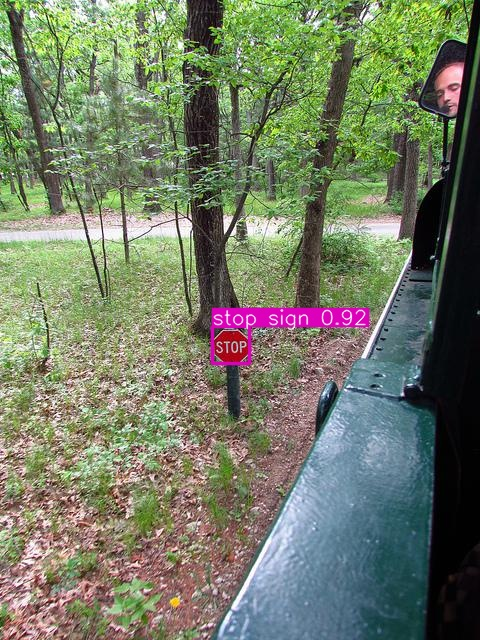

In [20]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')

# Get a validation image
val_images_path = 'val/images'
val_image_files = os.listdir(val_images_path)

if val_image_files:
    image_path = os.path.join(val_images_path, val_image_files[0])

    # Run inference
    results = model.predict(source=image_path, save=True)

    # Display the result
    display(Image(filename=results[0].save_dir + '/' + os.path.basename(image_path)))

else:
    print("No validation images found.")

In [ ]:
# Evaluate the model's performance on the validation set
metrics = model.val()

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 859.7±214.5 MB/s, size: 33.3 KB)


val: Scanning /content/val/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         26        127      0.663       0.61      0.759      0.588
                person         13         34      0.897      0.514      0.664      0.469
               bicycle          1          2      0.797        0.5      0.638      0.454
                   car          2          2      0.424        0.5      0.497      0.398
            motorcycle          2          3          1      0.945      0.995       0.83
                   bus          3          4       0.77          1      0.995      0.938
                 train          1          1          1          0      0.995      0.796
                 truck          1          1      0.591          1      0.995      0.697
             stop sign          1          1       0.64          1      0.995      0.796
                 bench          1          1          1          0      0.995      0.301
                   cat          1          1      0.905          1      0.995      0.895
                   do


image 1/1 /content/val/images/000000000151.jpg: 640x480 1 stop sign, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5


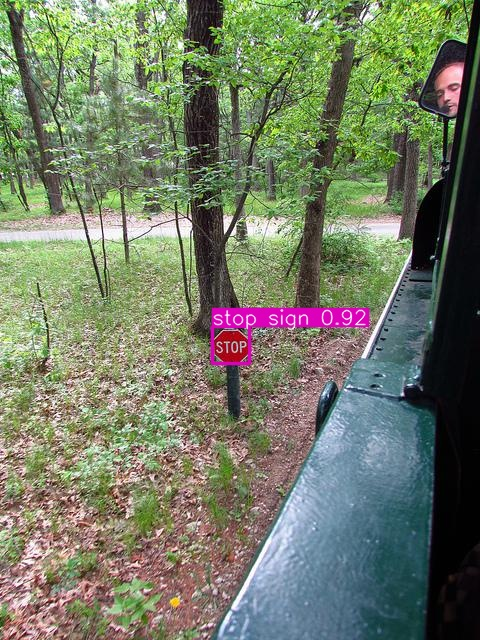


image 1/1 /content/val/images/000000000138.jpg: 576x640 1 bottle, 1 bowl, 2 potted plants, 1 oven, 1 refrigerator, 2 clocks, 2 vases, 10.3ms
Speed: 3.2ms preprocess, 10.3ms inference, 2.3ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict5


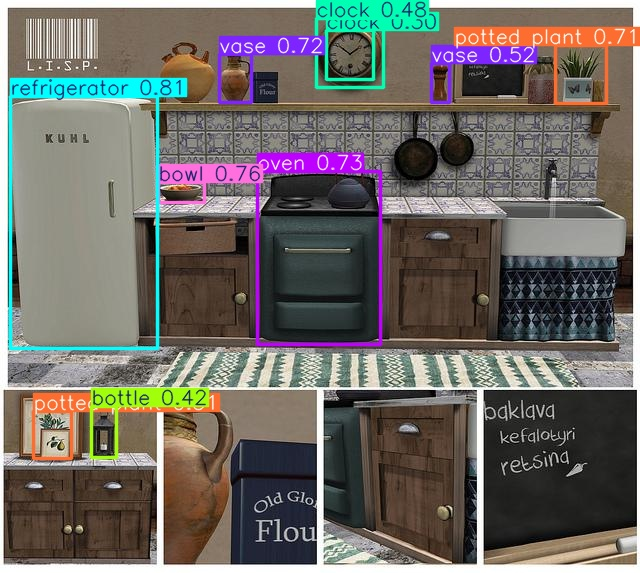


image 1/1 /content/val/images/000000000241.jpg: 640x480 3 persons, 1 backpack, 1 handbag, 1 bottle, 2 cups, 2 couchs, 1 potted plant, 1 remote, 13.7ms
Speed: 2.4ms preprocess, 13.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5


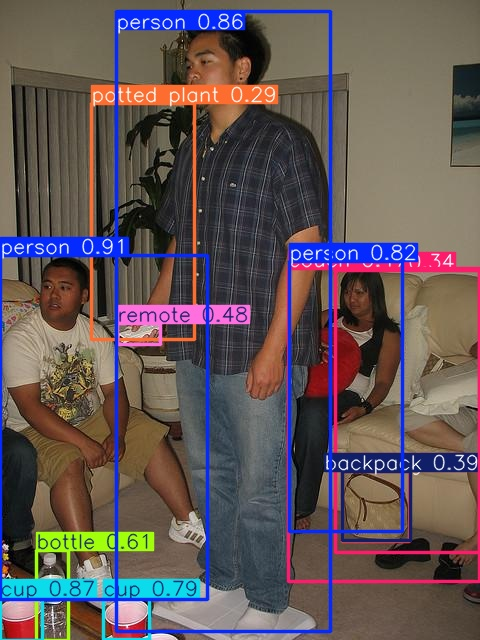


image 1/1 /content/val/images/000000000562.jpg: 640x448 3 toothbrushs, 12.9ms
Speed: 2.3ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict5


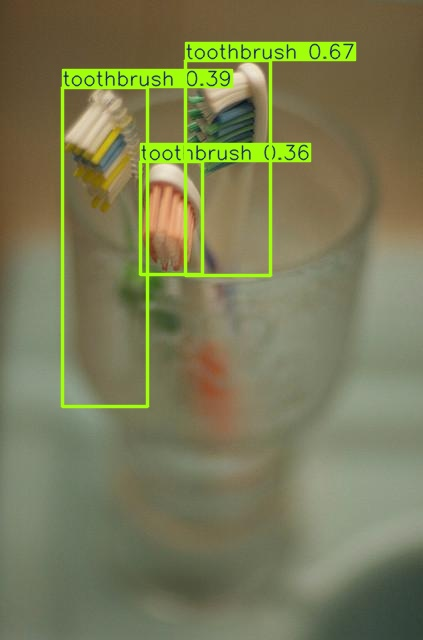


image 1/1 /content/val/images/000000000073.jpg: 640x576 1 motorcycle, 17.8ms
Speed: 2.5ms preprocess, 17.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/detect/predict5


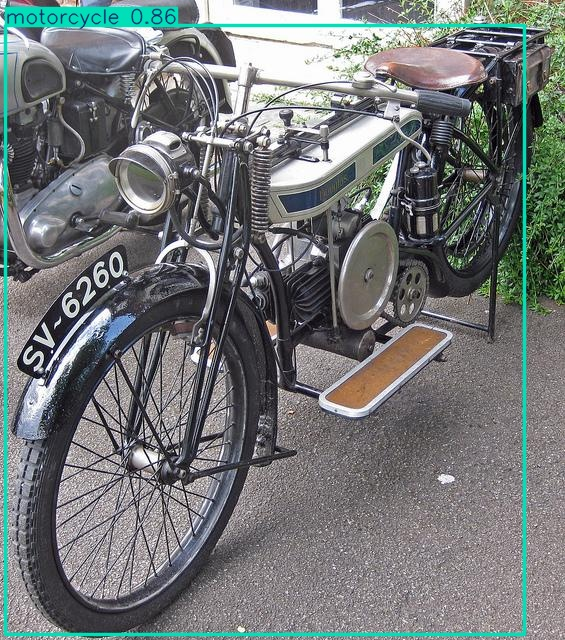


image 1/1 /content/val/images/000000000326.jpg: 448x640 1 person, 1 wine glass, 15.0ms
Speed: 2.1ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


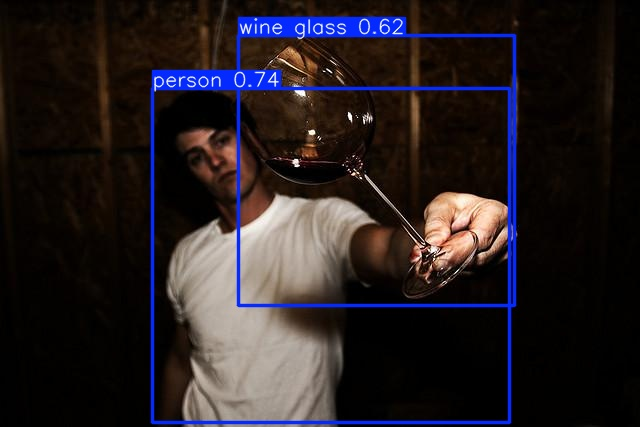


image 1/1 /content/val/images/000000000529.jpg: 640x448 2 persons, 1 motorcycle, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict5


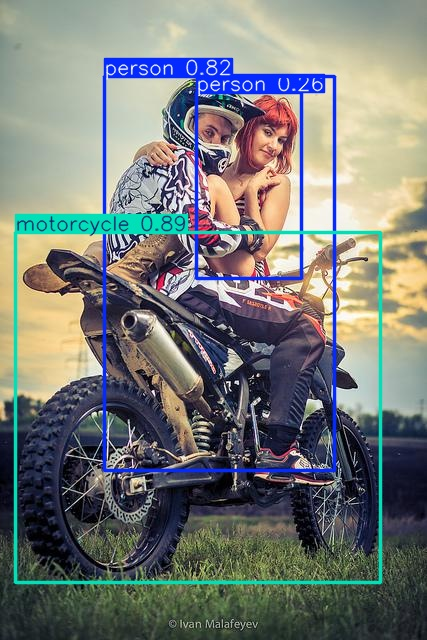


image 1/1 /content/val/images/000000000620.jpg: 640x480 1 pizza, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5


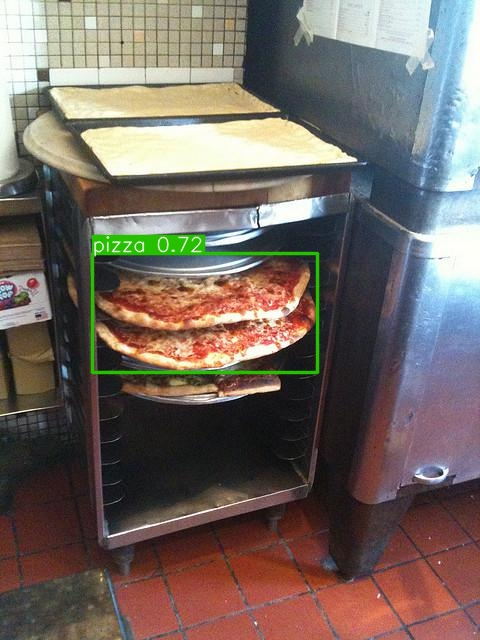


image 1/1 /content/val/images/000000000328.jpg: 512x640 3 persons, 1 backpack, 2 ties, 1 book, 10.9ms
Speed: 2.3ms preprocess, 10.9ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict5


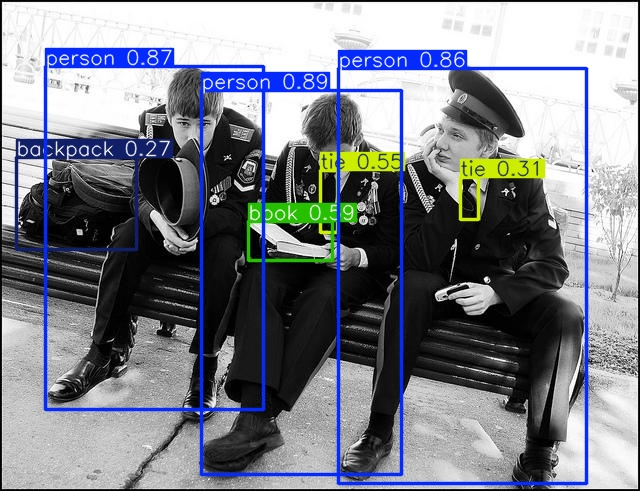


image 1/1 /content/val/images/000000000471.jpg: 448x640 1 bus, 12.8ms
Speed: 5.1ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


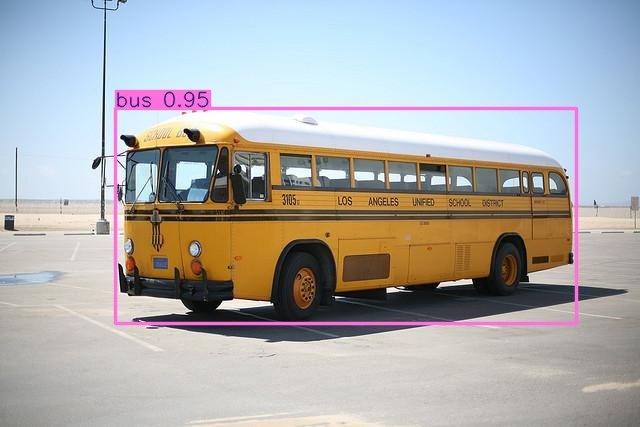


image 1/1 /content/val/images/000000000370.jpg: 640x480 1 person, 1 broccoli, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5


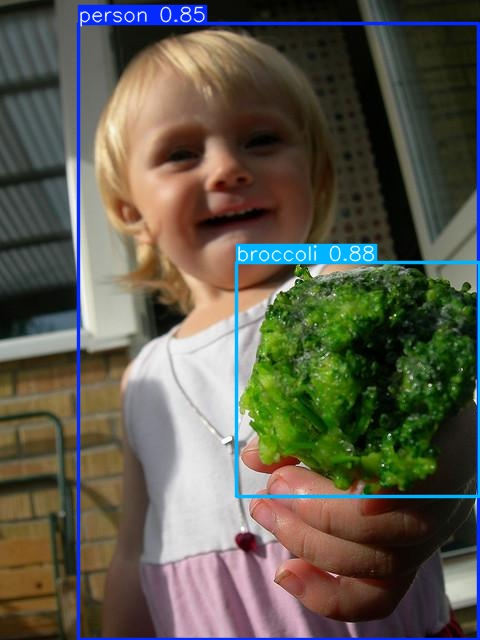


image 1/1 /content/val/images/000000000072.jpg: 640x448 3 giraffes, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict5


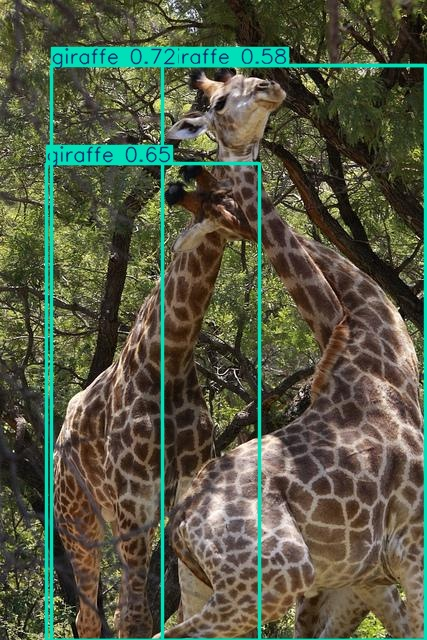


image 1/1 /content/val/images/000000000094.jpg: 448x640 1 car, 1 truck, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


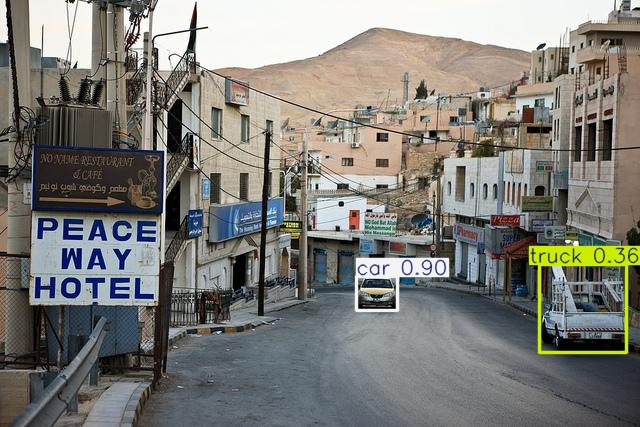


image 1/1 /content/val/images/000000000263.jpg: 640x608 2 elephants, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict5


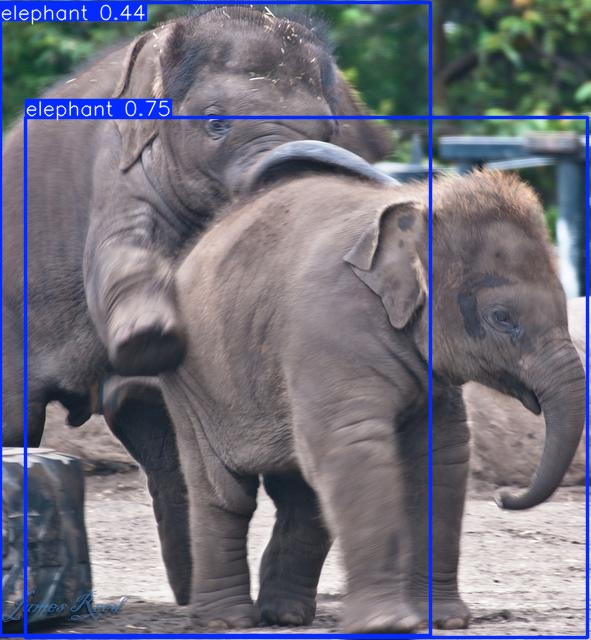


image 1/1 /content/val/images/000000000564.jpg: 640x544 2 persons, 29 chairs, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict5


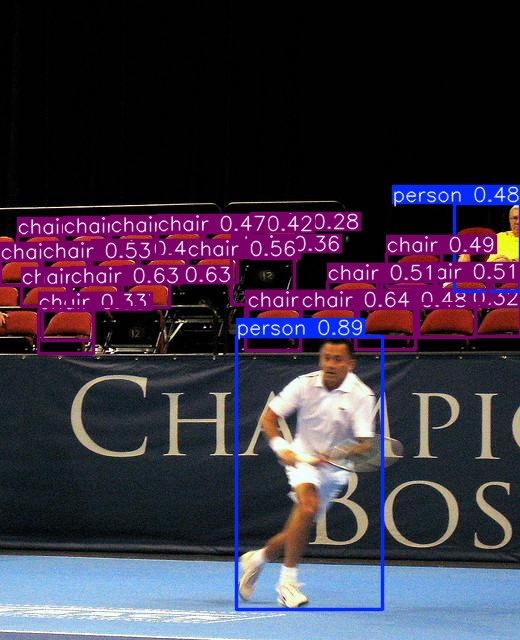


image 1/1 /content/val/images/000000000514.jpg: 640x384 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict5


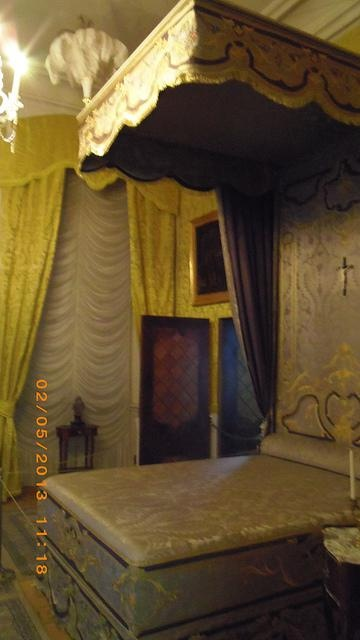


image 1/1 /content/val/images/000000000532.jpg: 480x640 2 persons, 2 buss, 1 truck, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


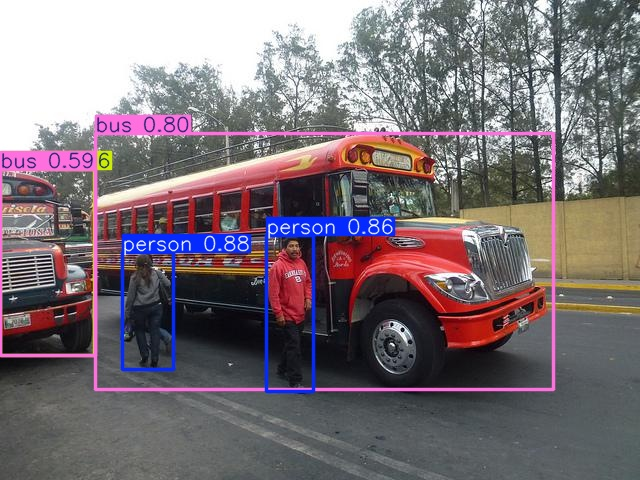


image 1/1 /content/val/images/000000000446.jpg: 640x480 1 person, 1 sports ball, 2 potted plants, 11.9ms
Speed: 4.9ms preprocess, 11.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5


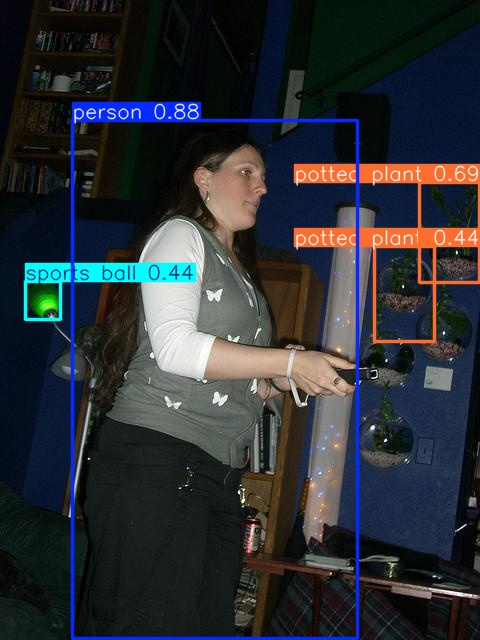


image 1/1 /content/val/images/000000000443.jpg: 480x640 2 persons, 1 dog, 1 remote, 1 cell phone, 14.0ms
Speed: 2.5ms preprocess, 14.0ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


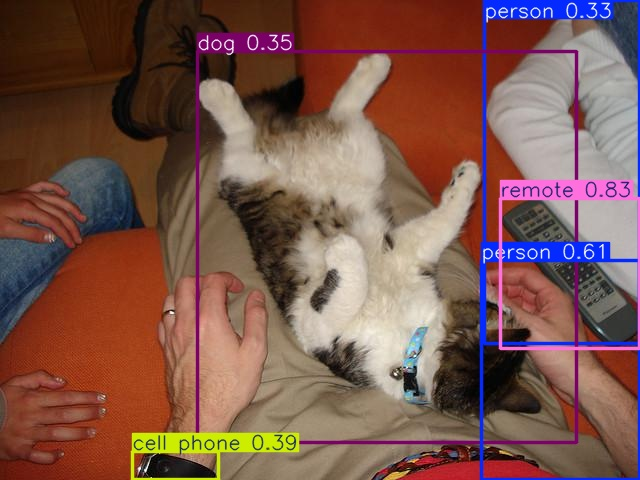


image 1/1 /content/val/images/000000000595.jpg: 480x640 1 tv, 13.6ms
Speed: 2.4ms preprocess, 13.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


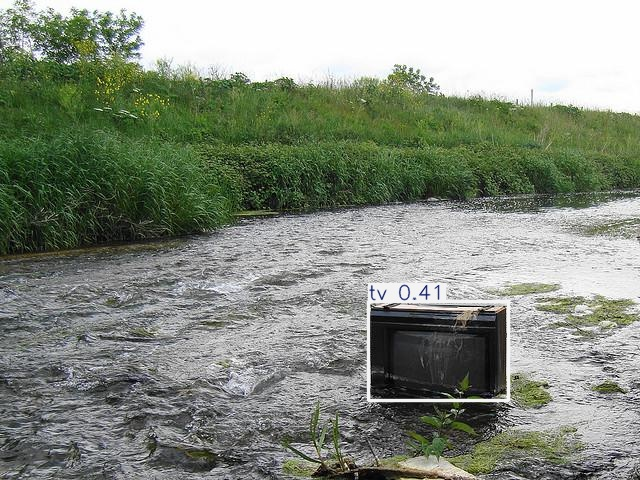


image 1/1 /content/val/images/000000000092.jpg: 448x640 1 fork, 1 cake, 1 dining table, 14.7ms
Speed: 5.0ms preprocess, 14.7ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


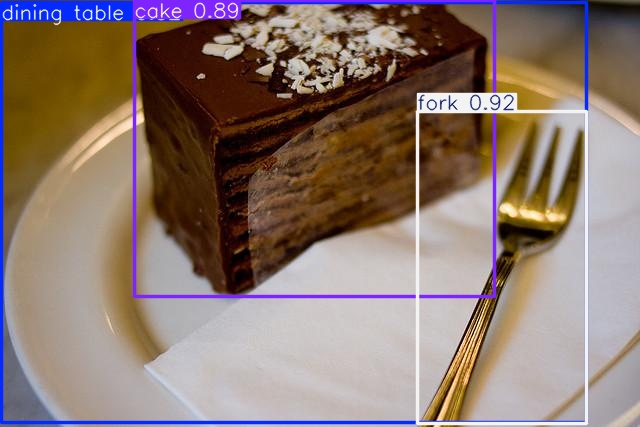


image 1/1 /content/val/images/000000000142.jpg: 640x480 2 bottles, 1 cup, 4 bananas, 1 cake, 1 dining table, 21.0ms
Speed: 1.8ms preprocess, 21.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5


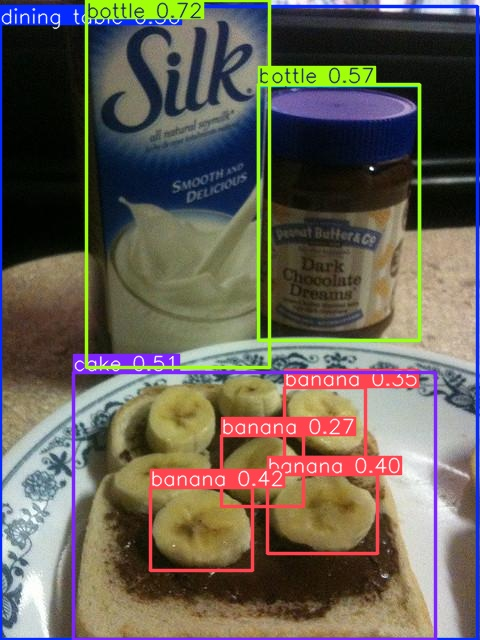


image 1/1 /content/val/images/000000000036.jpg: 640x512 1 person, 1 umbrella, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict5


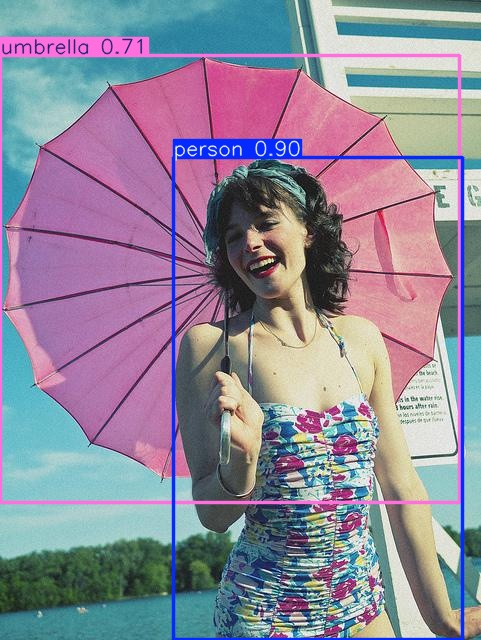


image 1/1 /content/val/images/000000000641.jpg: 448x640 3 persons, 1 bus, 18.7ms
Speed: 2.1ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


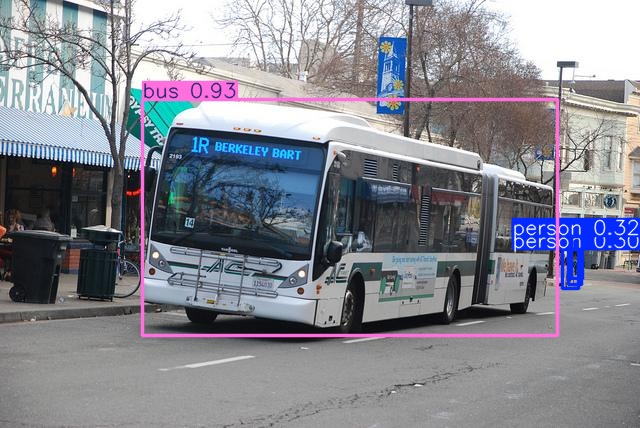


image 1/1 /content/val/images/000000000194.jpg: 480x640 1 broccoli, 1 pizza, 1 dining table, 11.7ms
Speed: 5.6ms preprocess, 11.7ms inference, 5.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


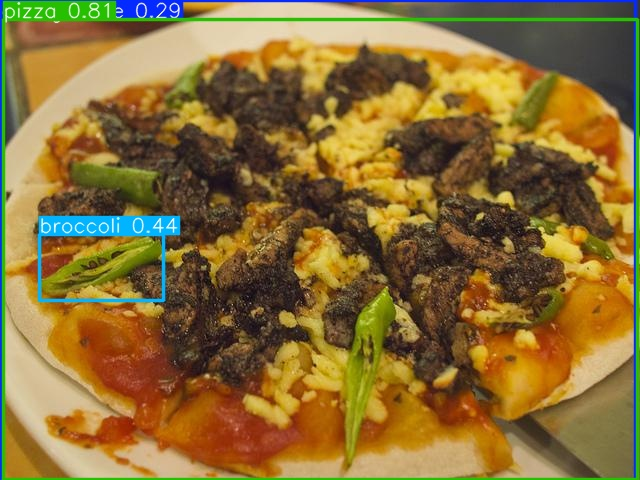


image 1/1 /content/val/images/000000000394.jpg: 640x640 2 dogs, 1 frisbee, 19.2ms
Speed: 5.3ms preprocess, 19.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


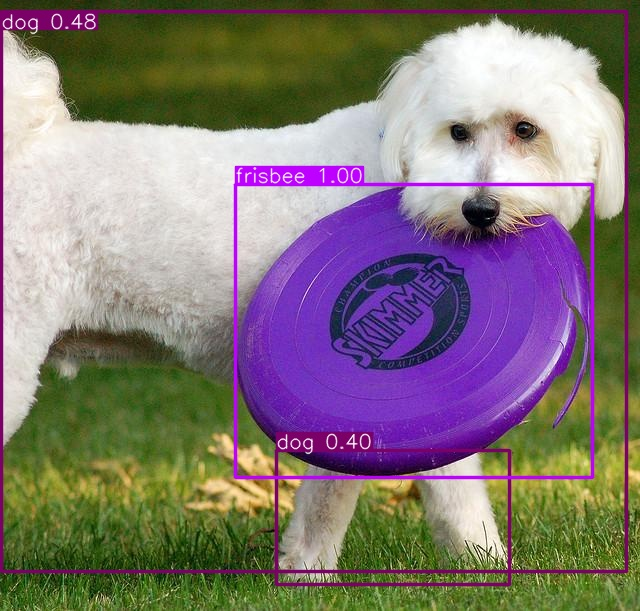

In [24]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')

# Get a list of all validation images
val_images_path = 'val/images'
val_image_files = os.listdir(val_images_path)

# Loop through all validation images and display the results
for image_file in val_image_files:
    image_path = os.path.join(val_images_path, image_file)
    results = model.predict(source=image_path, save=True)
    display(Image(filename=results[0].save_dir + '/' + os.path.basename(image_path)))